In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
!pip install -U matplotlib
!pip install -U font-manager

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not find a version that satisfies the requirement font-manager (from versions: none)
ERROR: No matching distribution found for font-manager


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings


Bad key text.latex.preview in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [5]:
warnings.simplefilter('ignore')

In [6]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [7]:
path = './data/'

df = pd.read_csv(path+'distance_merged.csv')

In [8]:
df

,Region_Name,Building_Age,Building_Use,JS_Price,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,Shortest_Distance_to_Subway,Shortest_Distance_to_School,Shortest_Distance_to_Univ,YearMonth,Shortest_Distance_to_Park
0,성동구,19,아파트,22000,59.97,292786.00,2.00,3.0,81.4,86.6,84.9,115.756491,77.5,38683.33,1.178712,555.986308,295.569643,1339.504535,201411,1028.419509
1,도봉구,18,아파트,16000,84.98,357523.33,3.00,4.3,72.5,78.6,74.9,106.866464,81.7,29800.00,0.848460,2027.675179,149.315861,765.750961,201103,627.870957
2,송파구,35,아파트,21000,46.54,654241.00,1.75,3.7,83.7,88.0,86.0,120.348837,80.9,68855.00,1.015461,255.774896,472.015224,2129.795311,201505,1405.703845
3,노원구,24,아파트,13000,59.28,588021.80,3.25,3.3,72.7,79.5,76.5,108.376186,80.1,23250.00,0.906348,283.565040,291.020714,517.741729,201107,1015.223086
4,관악구,14,아파트,34000,84.87,508137.00,2.50,4.5,79.2,85.6,82.7,121.038496,75.7,40303.85,1.274720,556.539907,273.268241,989.162559,201402,944.475850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,강서구,18,오피스텔,17000,28.45,567898.00,1.75,3.0,108.8,108.0,109.1,94.156094,180.2,27150.00,0.671993,1733.008129,386.728023,1161.499230,202206,29.148712
2996,노원구,27,아파트,15000,39.82,543267.00,1.50,4.1,93.8,98.1,94.4,89.535769,107.4,29095.45,0.730991,769.700633,196.588060,694.360317,201804,1469.233740
2997,성동구,15,아파트,25000,84.91,294446.00,2.75,3.2,76.1,82.6,80.3,114.344638,73.7,34142.86,1.084889,289.844463,129.800930,1369.175383,201304,527.038587
2998,영등포구,15,아파트,110000,156.66,366258.00,0.50,4.5,98.5,98.3,99.5,104.100145,135.1,157500.00,1.280663,174.634578,274.653099,3134.071537,202005,444.209048


## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - YearMonth : 년월
    - Building_Age : 건물연식
    - JS_Price : 전세가
   
- Continous
    - Sell_Price : 매매 가격
    - JS_BA = JS_Building Area : 임대 면적
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    - HSP_index = 
    - Population : 인구수
    - Crime_Rates : 범죄율
    - Shortest_Distance_to_Subway : 가장 가까운 지하철역과의 거리
    - Shortest_Distance_to_School : 가장 가까운 초중고등학교와의 거리
    - Shortest_Distance_to_Univ : 가장 가까운 대학교와의 거리
    - Shortest_Distance_to_Park : 가장 가까운 공원과의 거리
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region_Name                  3000 non-null   object 
 1   Building_Age                 3000 non-null   int64  
 2   Building_Use                 3000 non-null   object 
 3   JS_Price                     3000 non-null   int64  
 4   JS_BA                        3000 non-null   float64
 5   Population                   3000 non-null   float64
 6   IR                           3000 non-null   float64
 7   UR                           3000 non-null   float64
 8   LC_index                     3000 non-null   float64
 9   CA_index                     3000 non-null   float64
 10  TC_index                     3000 non-null   float64
 11  SDT_index                    3000 non-null   float64
 12  HSP_index                    3000 non-null   float64
 13  Sell_Price        

## Feature_Scaling

In [10]:
# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열 선택 (수치형 데이터만)
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# 데이터 정규화
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [11]:
# 범주형 변수 더미화 함수, 범주형 변수의 범주 레벨 간의 관계가 중요할 시 사용
def oh_encoding(df):
    # DataFrame의 복사본을 만듭니다.
    encoded_df = df.copy()
    for column in df.columns:
        if df[column].dtype == object:
            encoded_df = pd.get_dummies(encoded_df, columns=[column], prefix=column)
            print(column)
    return encoded_df

In [12]:
df_encoded = oh_encoding(df)

Region_Name
Building_Use


## DF 사전진단

### 선형패턴 확인

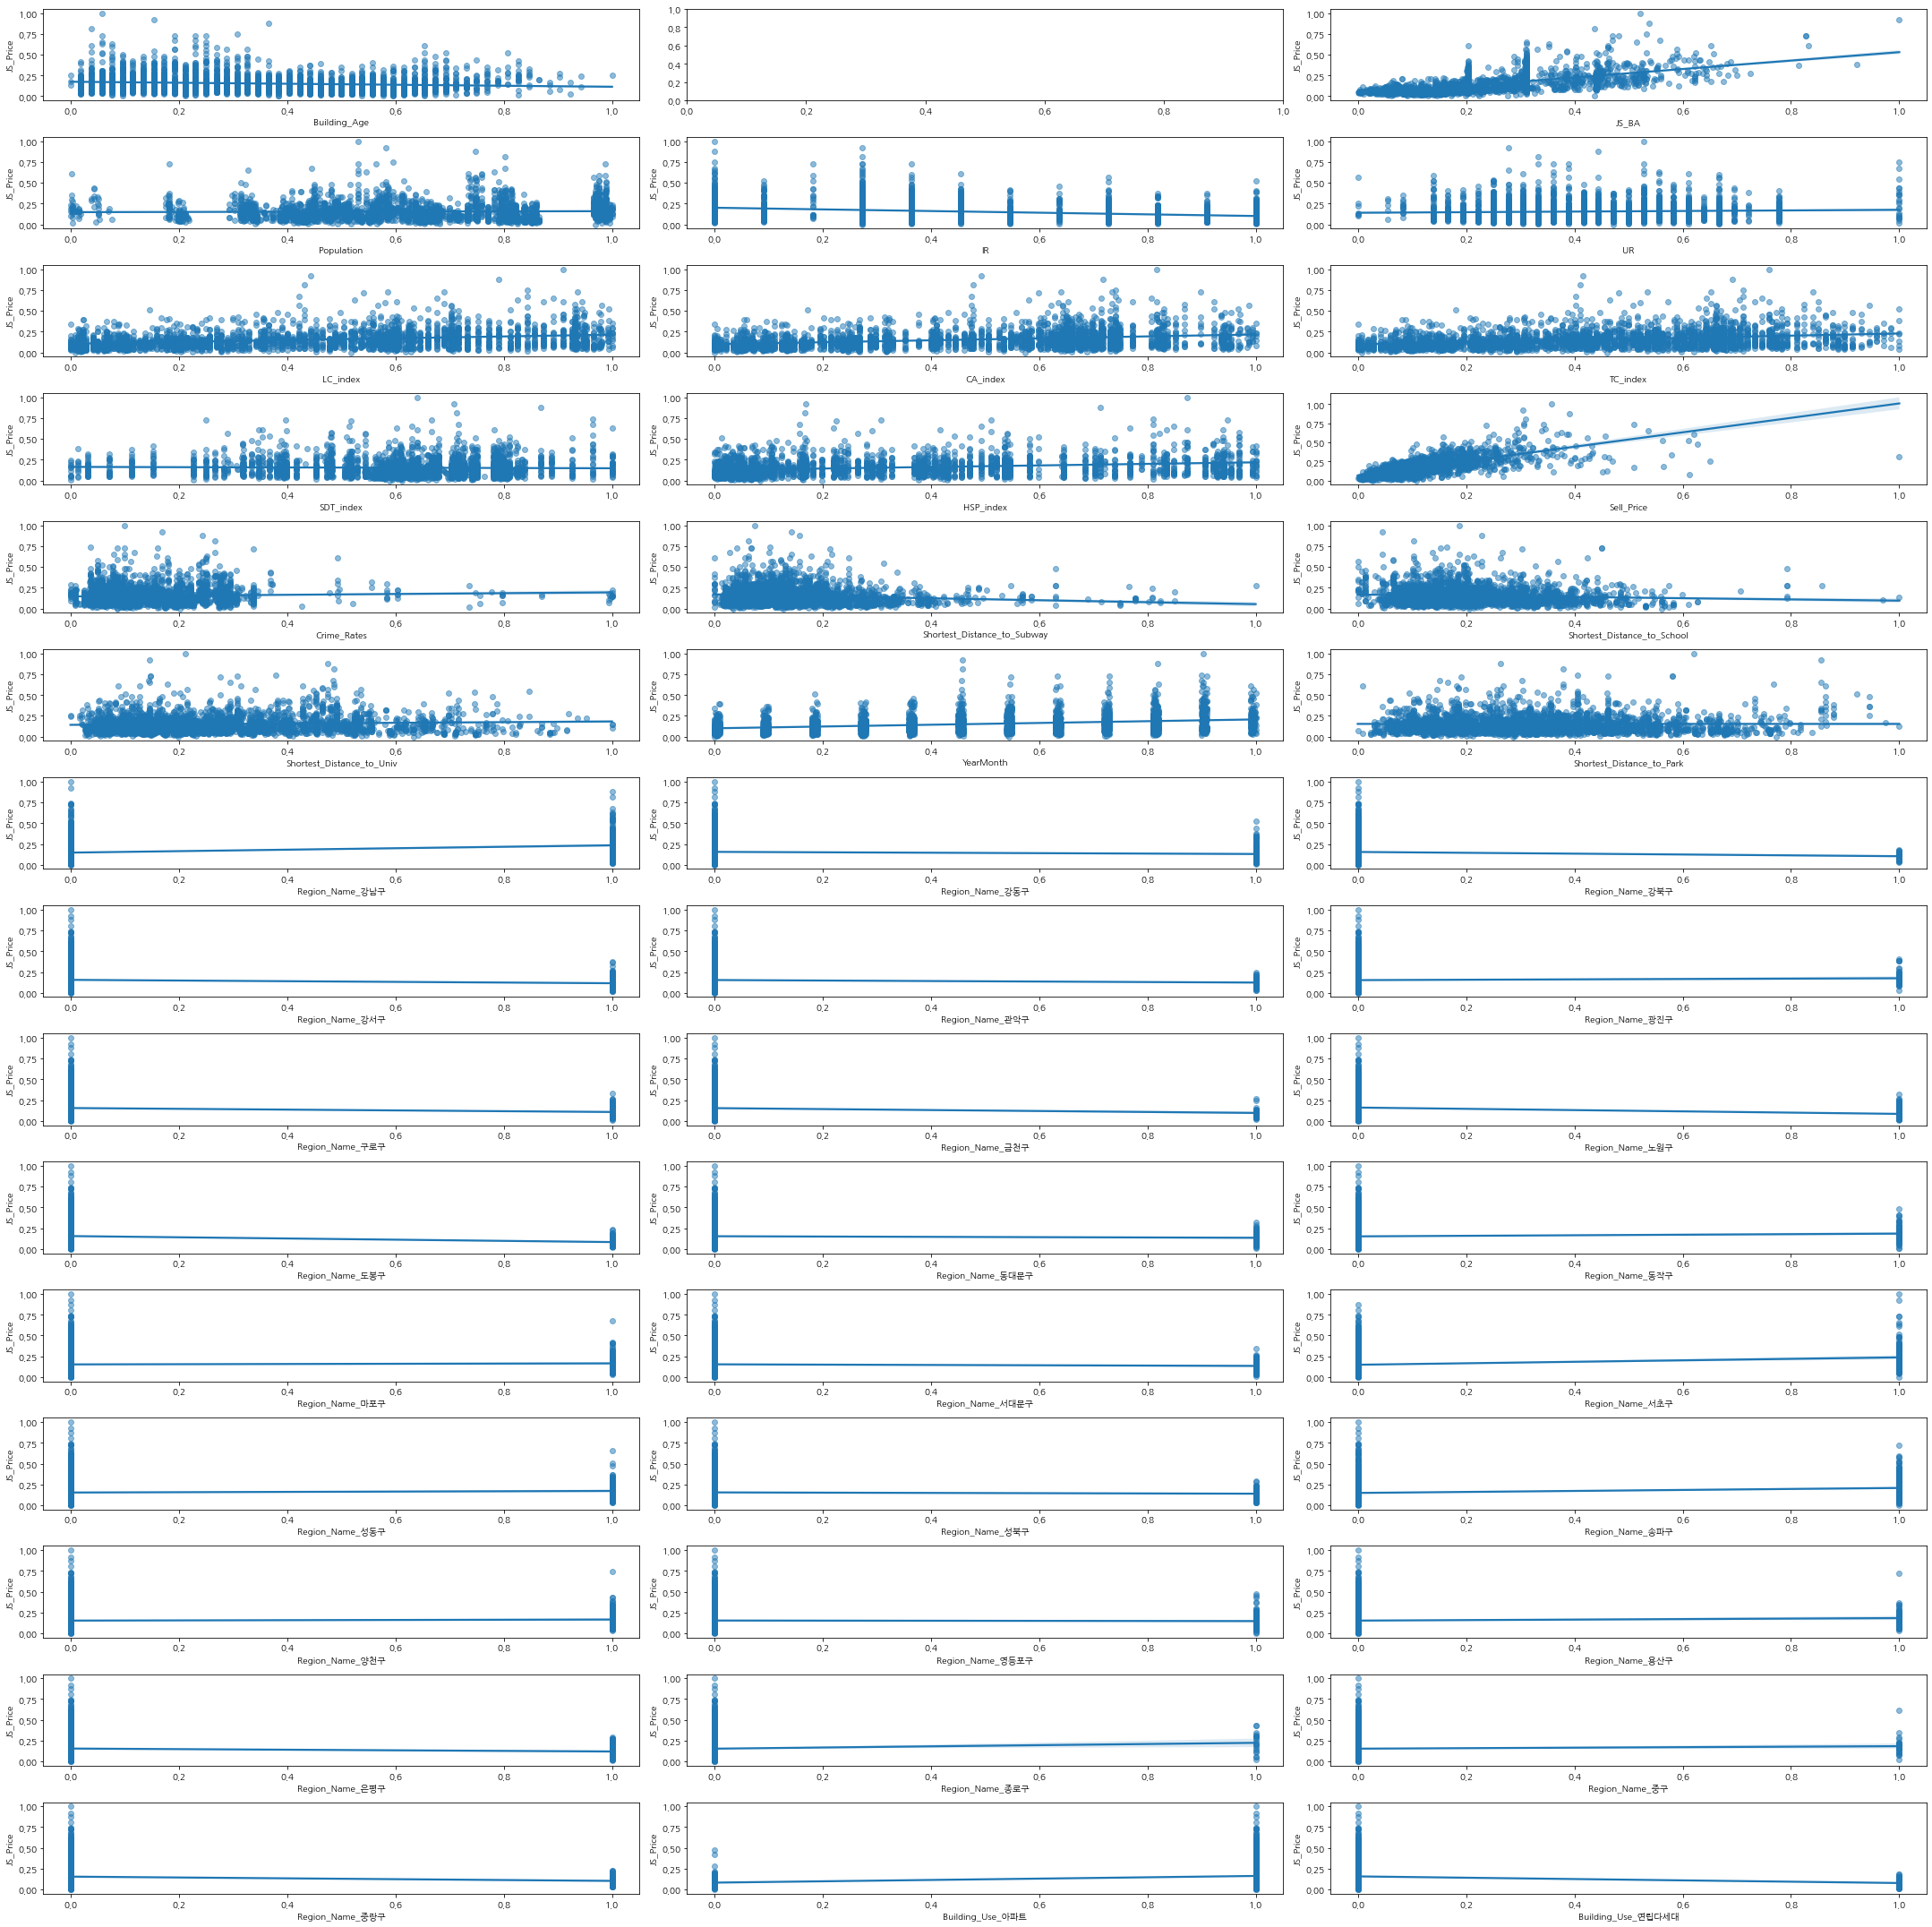

In [13]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30,30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 독립 변수와 종속 변수 간의 선형 관계 확인
for i, independent_column in enumerate(df_encoded.columns):
    if independent_column != 'JS_Price':
        if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
            sns.regplot(x=independent_column, y='JS_Price', data=df_encoded, ax=ax[i], scatter_kws={'alpha': 0.5})
            ax[i].set_xlabel(independent_column)
            ax[i].set_ylabel('JS_Price')

# 남은 subplot 비우기
for i in range(len(df_encoded.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

## 이상치 확인

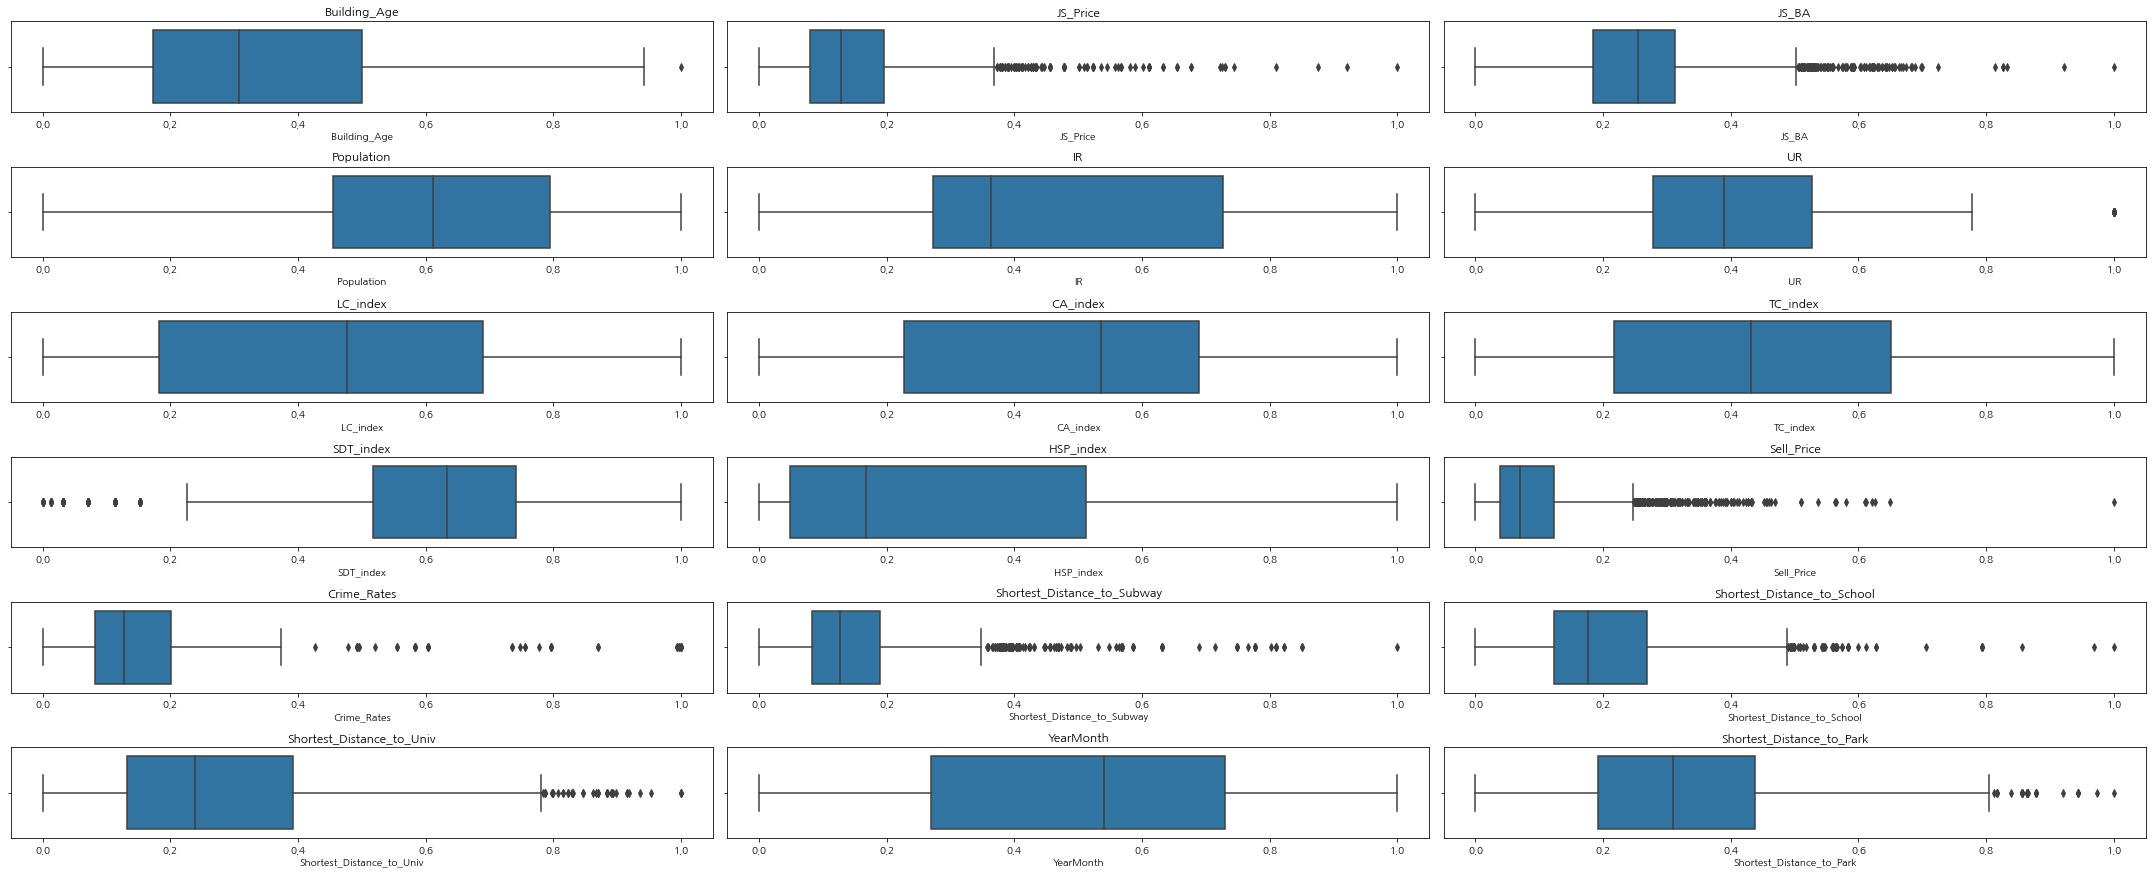

In [14]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 그래프를 그릴 컬럼 목록
columns_to_plot = [column for column in df_encoded.columns if not column.startswith('Region') and not column.startswith('Building_Use')]

for i, column in enumerate(columns_to_plot):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.boxplot(x=column, data=df_encoded, ax=ax[i], orient='v')
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### 정규성 확인

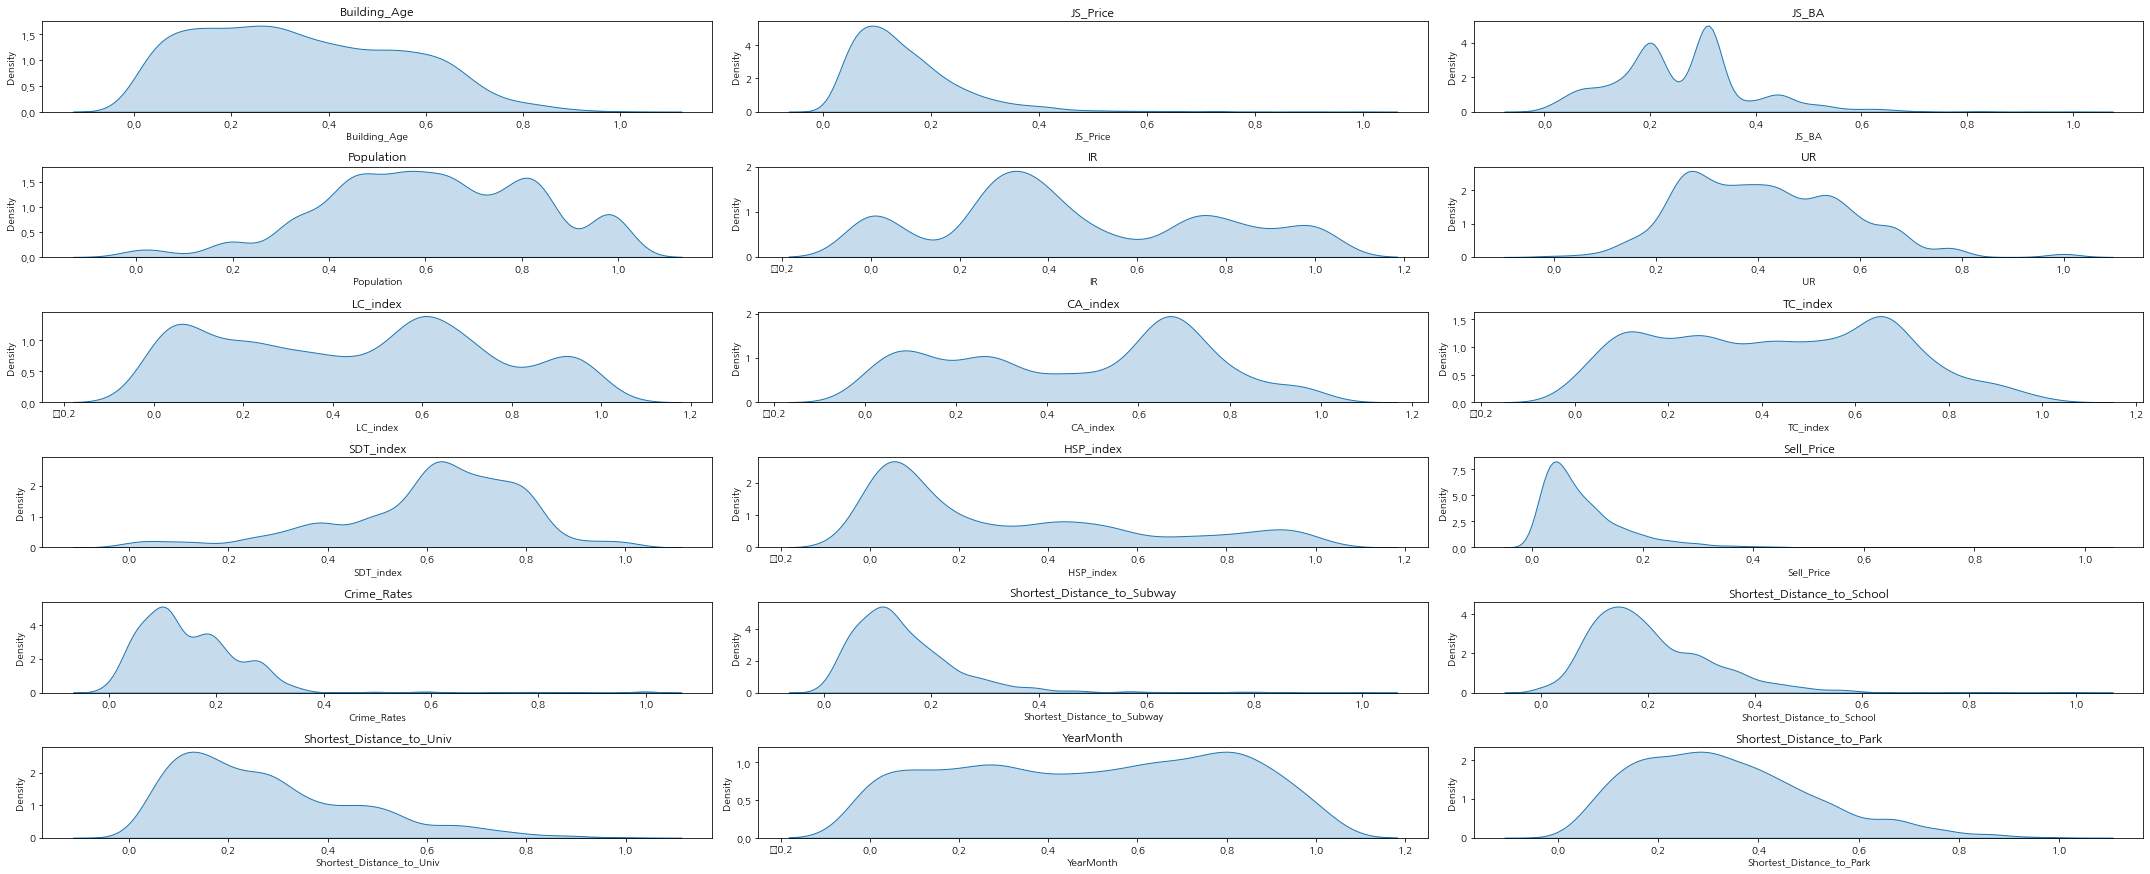

In [15]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 그래프를 그릴 컬럼 목록
columns_to_plot = [column for column in df_encoded.columns if not column.startswith('Region') and not column.startswith('Building_Use')]

for i, column in enumerate(columns_to_plot):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.kdeplot(data=df_encoded[column], ax=ax[i], shade=True)
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [16]:
for column in df_encoded.columns:
    print(f"{column}의 왜도는", scipy.stats.skew(df_encoded[column]))

Building_Age의 왜도는 0.3344408295529578
JS_Price의 왜도는 1.9708351890177325
JS_BA의 왜도는 0.7143003861761963
Population의 왜도는 -0.22985911313848573
IR의 왜도는 0.25801826875724226
UR의 왜도는 0.519603211767327
LC_index의 왜도는 0.08734431497904188
CA_index의 왜도는 -0.13577015886141314
TC_index의 왜도는 0.06780810016901391
SDT_index의 왜도는 -0.9336272953235571
HSP_index의 왜도는 0.8983043138103657
Sell_Price의 왜도는 2.410642070257709
Crime_Rates의 왜도는 3.010989323237078
Shortest_Distance_to_Subway의 왜도는 2.371289820540588
Shortest_Distance_to_School의 왜도는 1.28755215282569
Shortest_Distance_to_Univ의 왜도는 0.9621544258866085
YearMonth의 왜도는 -0.06882170074640631
Shortest_Distance_to_Park의 왜도는 0.6879342090251251
Region_Name_강남구의 왜도는 3.0151134457776356
Region_Name_강동구의 왜도는 3.5627764550103427
Region_Name_강북구의 왜도는 9.095388397356725
Region_Name_강서구의 왜도는 3.390807498282993
Region_Name_관악구의 왜도는 5.957200055958587
Region_Name_광진구의 왜도는 7.322687892830863
Region_Name_구로구의 왜도는 4.905654760192192
Region_Name_금천구의 왜도는 8.598618967544386
Region_Name_노원구의 

## Regression Analysis

In [17]:
df_encoded.columns

Index(['Building_Age', 'JS_Price', 'JS_BA', 'Population', 'IR', 'UR',
       'LC_index', 'CA_index', 'TC_index', 'SDT_index', 'HSP_index',
       'Sell_Price', 'Crime_Rates', 'Shortest_Distance_to_Subway',
       'Shortest_Distance_to_School', 'Shortest_Distance_to_Univ', 'YearMonth',
       'Shortest_Distance_to_Park', 'Region_Name_강남구', 'Region_Name_강동구',
       'Region_Name_강북구', 'Region_Name_강서구', 'Region_Name_관악구',
       'Region_Name_광진구', 'Region_Name_구로구', 'Region_Name_금천구',
       'Region_Name_노원구', 'Region_Name_도봉구', 'Region_Name_동대문구',
       'Region_Name_동작구', 'Region_Name_마포구', 'Region_Name_서대문구',
       'Region_Name_서초구', 'Region_Name_성동구', 'Region_Name_성북구',
       'Region_Name_송파구', 'Region_Name_양천구', 'Region_Name_영등포구',
       'Region_Name_용산구', 'Region_Name_은평구', 'Region_Name_종로구',
       'Region_Name_중구', 'Region_Name_중랑구', 'Building_Use_아파트',
       'Building_Use_연립다세대', 'Building_Use_오피스텔'],
      dtype='object')

In [18]:
# 특성 선택
selected_features = ['Building_Age', 'JS_BA', 'Population', 'IR', 'UR',
       'LC_index', 'CA_index', 'TC_index', 'SDT_index', 'HSP_index',
       'Sell_Price', 'Crime_Rates', 'Shortest_Distance_to_Subway',
       'Shortest_Distance_to_School', 'Shortest_Distance_to_Univ', 'YearMonth',
       'Shortest_Distance_to_Park', 'Region_Name_강남구', 'Region_Name_강동구',
       'Region_Name_강북구', 'Region_Name_강서구', 'Region_Name_관악구',
       'Region_Name_광진구', 'Region_Name_구로구', 'Region_Name_금천구',
       'Region_Name_노원구', 'Region_Name_도봉구', 'Region_Name_동대문구',
       'Region_Name_동작구', 'Region_Name_마포구', 'Region_Name_서대문구',
       'Region_Name_서초구', 'Region_Name_성동구', 'Region_Name_성북구',
       'Region_Name_송파구', 'Region_Name_양천구', 'Region_Name_영등포구',
       'Region_Name_용산구', 'Region_Name_은평구', 'Region_Name_종로구',
       'Region_Name_중구', 'Region_Name_중랑구', 'Building_Use_아파트',
       'Building_Use_연립다세대', 'Building_Use_오피스텔']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:36:36   Log-Likelihood:                 4842.9
No. Observations:                3000   AIC:                            -9598.
Df Residuals:                    2956   BIC:                            -9333.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## 다중공선성

In [19]:
# X 데이터에서 상수항 제거 (VIF 계산에서 상수항은 제외해야 함)
X_without_constant = X.drop('const', axis=1)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X_without_constant.columns
vif["VIF"] = [variance_inflation_factor(X_without_constant.values, i) for i in range(X_without_constant.shape[1])]

In [20]:
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
22,Region_Name_광진구,inf
23,Region_Name_구로구,inf
25,Region_Name_노원구,inf
26,Region_Name_도봉구,inf
27,Region_Name_동대문구,inf
28,Region_Name_동작구,inf
29,Region_Name_마포구,inf
30,Region_Name_서대문구,inf
31,Region_Name_서초구,inf
32,Region_Name_성동구,inf


- 다중공선성, 상관분석 결과, 회귀분석 모델의 각 독립변수의 통계적 유의성(P>|t|값으로판단)을 고려하여 독립변수 제거하고 다시 모델 생성

In [21]:
# 특성 선택
selected_features = ['Building_Age', 'JS_BA', 'IR', 'LC_index',
                     'HSP_index', 'Sell_Price', 'Shortest_Distance_to_Subway', 'YearMonth',
                     'Region_Name_강남구', 'Region_Name_서초구', 'Region_Name_송파구',
                     'Building_Use_연립다세대', 'Building_Use_오피스텔']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     794.2
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:36:37   Log-Likelihood:                 4741.5
No. Observations:                3000   AIC:                            -9455.
Df Residuals:                    2986   BIC:                            -9371.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- 모든 변수가 통계적으로 유의한 것을 확인할 수 있다.

## 모델가정 확인

### 선형성

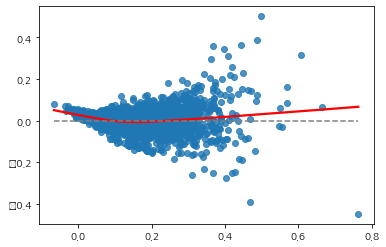

In [22]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})

plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

### 정규성

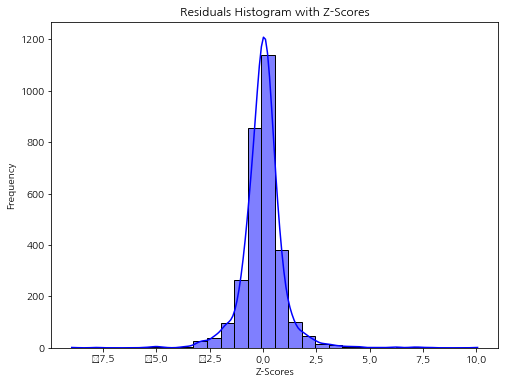

Shapiro-Wilk Test p-value: 1.401298464324817e-45


In [23]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

- 정규성 만족을 위해 이상치 제거한 뒤 다시 정규성 확인

In [24]:
from statsmodels.stats.outliers_influence import OLSInfluence

# 이상치 확인
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head()

2009    0.478459
51      0.127295
1762    0.083680
1864    0.057410
1317    0.038415
dtype: float64

In [25]:
# Cook's 거리를 Series로 변환하고 내림차순으로 정렬
cd_series = pd.Series(cd, name="Cook's Distance")
cd_sorted = cd_series.sort_values(ascending=False)

# Cook's 거리가 가장 큰 관측치 50개의 인덱스 확인
outlier_indices = cd_sorted.head(50).index

# Cook's 거리가 큰 관측치를 데이터프레임에서 제거
df = df.drop(index=outlier_indices)

In [26]:
# 특성 선택
selected_features = ['Building_Age', 'JS_BA', 'IR', 'LC_index',
                     'HSP_index', 'Sell_Price', 'Shortest_Distance_to_Subway', 'YearMonth',
                     'Region_Name_강남구', 'Region_Name_서초구', 'Region_Name_송파구',
                     'Building_Use_연립다세대', 'Building_Use_오피스텔']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

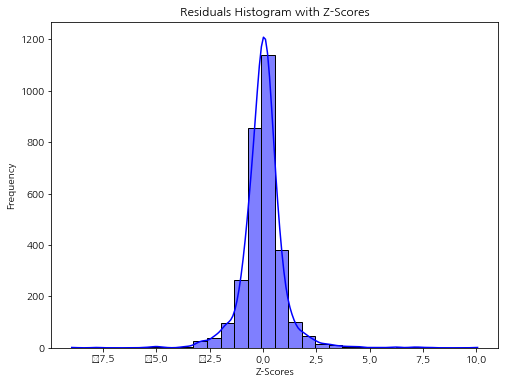

Shapiro-Wilk Test p-value: 1.401298464324817e-45


In [27]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

- 정규성 만족을 위해 종속변수 로그변환한 뒤 다시 정규성 확인

In [28]:
df_encoded['JS_Price'] = np.log(df_encoded['JS_Price']+1)

In [29]:
# 특성 선택
selected_features = ['Building_Age', 'JS_BA', 'IR', 'LC_index',
                     'HSP_index', 'Sell_Price', 'Shortest_Distance_to_Subway', 'YearMonth',
                     'Region_Name_강남구', 'Region_Name_서초구', 'Region_Name_송파구',
                     'Building_Use_연립다세대', 'Building_Use_오피스텔']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

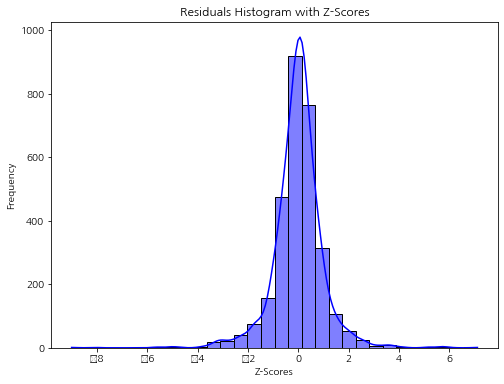

Shapiro-Wilk Test p-value: 7.303427466214514e-40


In [30]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

### 등분산성

<AxesSubplot:>

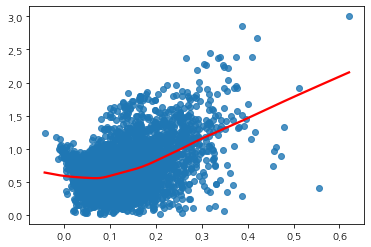

In [31]:
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

### 독립성

In [32]:
print(model.summary().tables[2])

Omnibus:                      549.144   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9686.985
Skew:                          -0.340   Prob(JB):                         0.00
Kurtosis:                      11.777   Cond. No.                         66.1


- Durbin-Watson:1.994로 1.5~2.5사이이므로 잔차 간의 자기상관이 없다고 할 수 있으며, 회귀 모델은 독립성 가정을 만족

## 최종 모델 점검

In [33]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     900.2
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:36:40   Log-Likelihood:                 5523.6
No. Observations:                3000   AIC:                        -1.102e+04
Df Residuals:                    2986   BIC:                        -1.094e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- 정규성을 만족시키기 위해 로그변환한 결과 YearMonth가 통계적으로 유의하지 않다고 나오므로 제거하고 다시 모델 생성

In [34]:
# 특성 선택
selected_features = ['Building_Age', 'JS_BA', 'IR', 'LC_index',
                     'HSP_index', 'Sell_Price', 'Shortest_Distance_to_Subway',
                     'Region_Name_강남구', 'Region_Name_서초구', 'Region_Name_송파구',
                     'Building_Use_연립다세대', 'Building_Use_오피스텔']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     972.8
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:36:40   Log-Likelihood:                 5520.3
No. Observations:                3000   AIC:                        -1.101e+04
Df Residuals:                    2987   BIC:                        -1.094e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [35]:
model.params.sort_values(ascending=False)

Sell_Price                     0.454758
JS_BA                          0.297387
LC_index                       0.101974
const                          0.041654
Region_Name_강남구                0.039610
Region_Name_서초구                0.026566
Region_Name_송파구                0.019588
Building_Use_오피스텔             -0.012010
Building_Use_연립다세대            -0.014617
IR                            -0.021636
Shortest_Distance_to_Subway   -0.055981
HSP_index                     -0.056624
Building_Age                  -0.110557
dtype: float64